<a href="https://colab.research.google.com/github/nishelpeirispulle/depression_prediction/blob/main/Copy_of_depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection  import GridSearchCV

In [ ]:
depression_dataset = pd.read_csv('/content/b_depressed.csv')

In [ ]:
depression_dataset.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [ ]:
depression_dataset.shape

(1429, 23)

checking for null values

In [ ]:
depression_dataset.isnull().values.any()

True

checking for null values inneach row

In [ ]:
depression_dataset.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

checking skewness


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


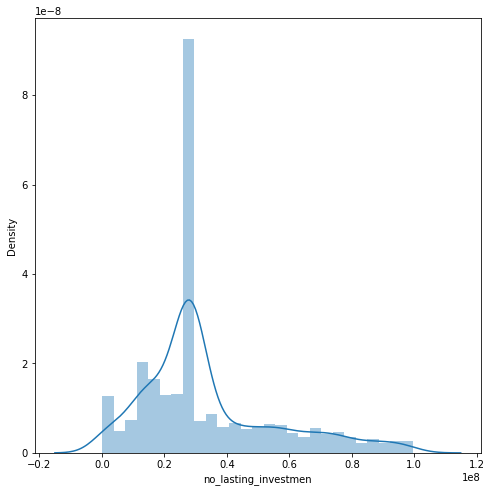

In [ ]:
fig , ax = plt.subplots( figsize =(8,8))
sns.distplot(depression_dataset.no_lasting_investmen)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


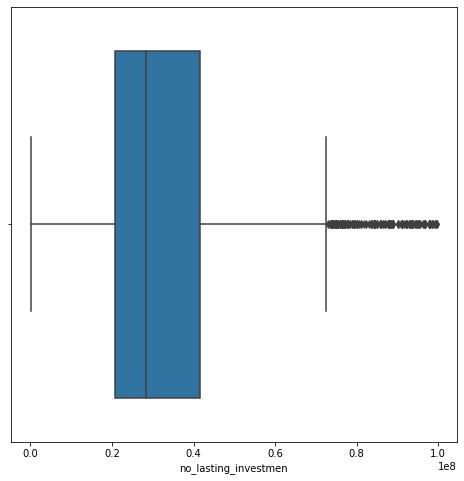

In [ ]:
fig , ax = plt.subplots( figsize =(8,8))
sns.boxplot(depression_dataset.no_lasting_investmen)

Dropping the rows which contains null values

In [ ]:
depression_dataset= depression_dataset.dropna(how='any')

checking for new no of rows and columns

In [ ]:
depression_dataset.shape

(1409, 23)

In [ ]:
depression_dataset

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


<Figure size 1800x432 with 0 Axes>

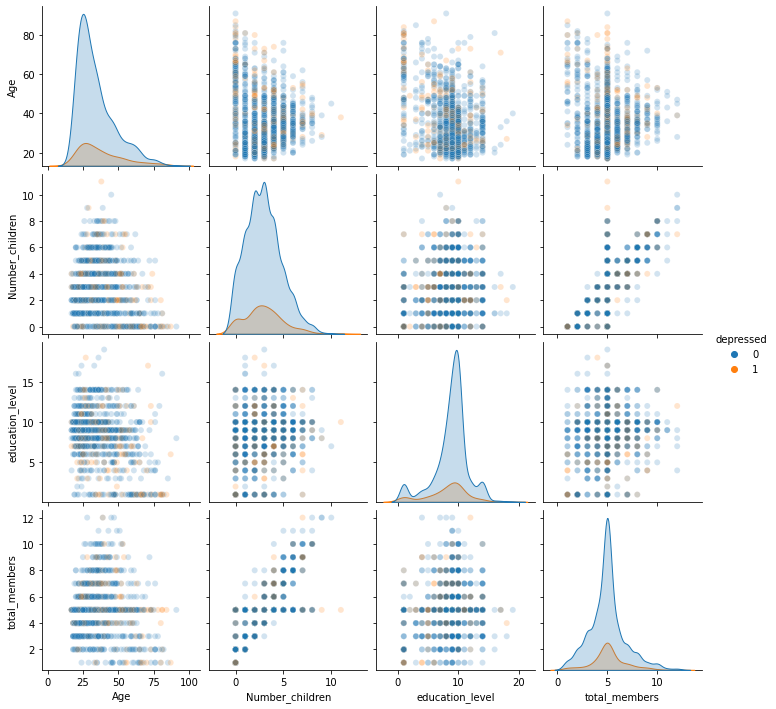

In [ ]:
depression_datasetPairplot = depression_dataset.drop(['Survey_id' , 'Married' , 'Ville_id' , 'sex'  , 'gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business' , 'incoming_agricultural' , 'farm_expenses' , 'labor_primary' , 'lasting_investment' , 'no_lasting_investmen'], axis=1)
depression_datasetPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=depression_datasetPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

<Figure size 1800x432 with 0 Axes>

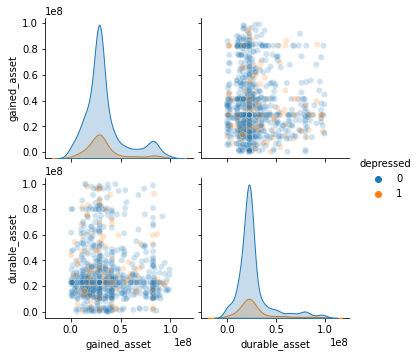

In [ ]:
depression_datasetPairplot = depression_dataset.drop(['save_asset','Survey_id' , 'Ville_id' , 'sex' , 'Age' , 'Married' , 'Number_children' , 'education_level' , 'total_members' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business' , 'incoming_agricultural' , 'farm_expenses' , 'labor_primary' , 'lasting_investment' , 'no_lasting_investmen'], axis=1)
depression_datasetPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=depression_datasetPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

<Figure size 1800x432 with 0 Axes>

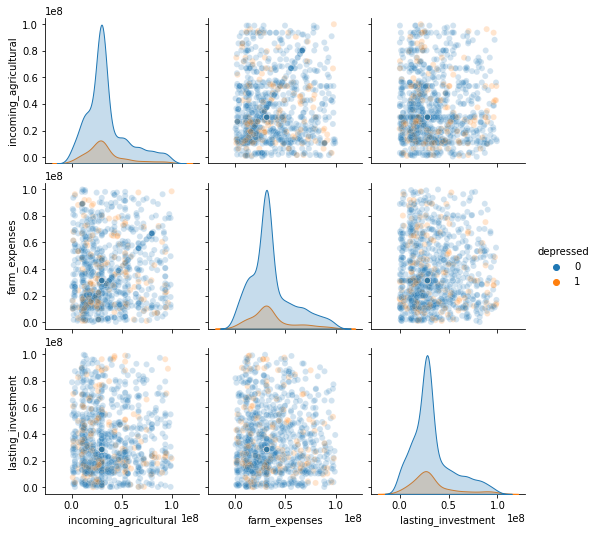

In [ ]:
depression_datasetPairplot = depression_dataset.drop(['Survey_id' , 'Ville_id' , 'sex' , 'Age' , 'Married' , 'Number_children' , 'education_level' , 'total_members' , 'gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business'  , 'labor_primary'     , 'no_lasting_investmen'], axis=1)
depression_datasetPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=depression_datasetPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

In [ ]:
depression_datasetCorr = depression_dataset.drop(['no_lasting_investmen'], axis=1)

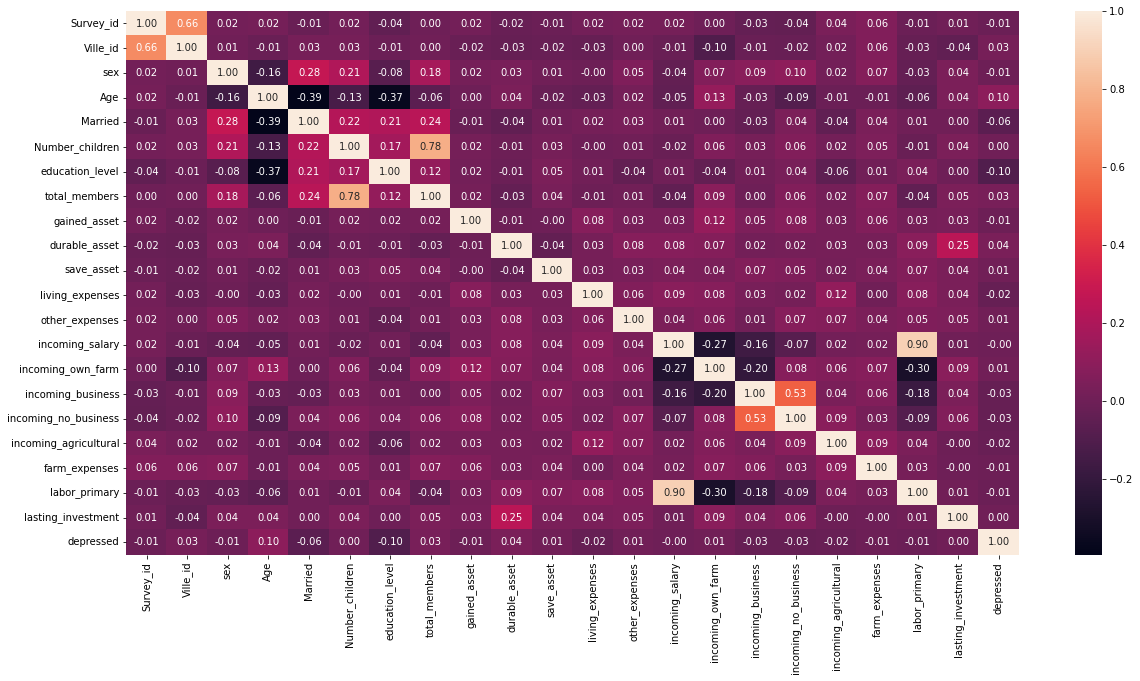

In [ ]:
plt.subplots(figsize=(20,10))
sns.heatmap(depression_datasetCorr.corr(), annot = True, fmt = ".2f")
plt.show()

Dropping columns

In [ ]:
depression_dataset =depression_dataset.drop(['no_lasting_investmen', 'Survey_id', 'Ville_id', 'gained_asset', 'durable_asset', 'save_asset', 'farm_expenses', 'labor_primary', 'Number_children','lasting_investment','incoming_agricultural'],axis=1)

updated dataset

In [ ]:
depression_dataset

,sex,Age,Married,education_level,total_members,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,depressed
0,1,28,1,10,5,26692283,28203066,0,0,0,0,0
1,1,23,1,8,5,26692283,28203066,0,0,0,0,1
2,1,22,1,9,5,26692283,28203066,0,0,0,0,0
3,1,27,1,10,4,397715,44042267,0,1,0,1,0
4,0,59,0,10,6,80877619,74503502,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,25,1,7,5,26692283,28203066,0,0,0,0,0
1425,1,28,1,10,6,10476722,71588707,0,1,0,0,0
1426,1,66,0,1,1,12545372,56534257,0,1,0,0,1
1427,1,51,1,12,5,26692283,28203066,0,0,0,0,0


In [ ]:
depression_dataset.describe()

,sex,Age,Married,education_level,total_members,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,depressed
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1.409000e+03,1.409000e+03,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000
mean,0.918382,34.733854,0.774308,8.697658,4.996451,3.248661e+07,3.362794e+07,0.176011,0.254081,0.109297,0.264017,0.166785
std,0.273879,13.800712,0.418186,2.913673,1.772778,2.101274e+07,2.159725e+07,0.380965,0.435498,0.312123,0.440965,0.372916
min,0.000000,17.000000,0.000000,1.000000,1.000000,2.629190e+05,1.729660e+05,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,25.000000,1.000000,8.000000,4.000000,2.103352e+07,2.114029e+07,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,31.000000,1.000000,9.000000,5.000000,2.669228e+07,2.820307e+07,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,42.000000,1.000000,10.000000,6.000000,3.870381e+07,4.027866e+07,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,91.000000,1.000000,19.000000,12.000000,9.929528e+07,9.982380e+07,1.000000,1.000000,1.000000,1.000000,1.000000


Getting the count of depressed and non depressed people

In [ ]:
depression_dataset['depressed'].value_counts()

0    1174
1     235
Name: depressed, dtype: int64

In [ ]:
depression_dataset.groupby('depressed').mean()

,sex,Age,Married,education_level,total_members,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business
depressed,,,,,,,,,,,
0,0.919080,34.115843,0.786201,8.824532,4.970187,3.271356e+07,3.352065e+07,0.176320,0.252129,0.113288,0.269165
1,0.914894,37.821277,0.714894,8.063830,5.127660,3.135282e+07,3.416392e+07,0.174468,0.263830,0.089362,0.238298


Seperating the features and labels

In [ ]:
x= depression_dataset.drop(columns='depressed',axis=1)
y= depression_dataset['depressed']

In [ ]:
print(x)

      sex  Age  Married  education_level  total_members  living_expenses  \
0       1   28        1               10              5         26692283   
1       1   23        1                8              5         26692283   
2       1   22        1                9              5         26692283   
3       1   27        1               10              4           397715   
4       0   59        0               10              6         80877619   
...   ...  ...      ...              ...            ...              ...   
1424    1   25        1                7              5         26692283   
1425    1   28        1               10              6         10476722   
1426    1   66        0                1              1         12545372   
1427    1   51        1               12              5         26692283   
1428    1   33        0                8              5         10289875   

      other_expenses  incoming_salary  incoming_own_farm  incoming_business  \
0       

In [ ]:
print(y)

0       0
1       1
2       0
3       0
4       0
       ..
1424    0
1425    0
1426    1
1427    0
1428    0
Name: depressed, Length: 1409, dtype: int64


#Standardization

In [ ]:
scalar = StandardScaler()

fitting data

In [ ]:
scalar.fit(x)

StandardScaler()

Transforming the data

In [ ]:
Standardized_data = scalar.transform(x)

In [ ]:
print(Standardized_data)

[[ 0.2981136  -0.48810848  0.5398849  ... -0.58363342 -0.35029868
  -0.59893831]
 [ 0.2981136  -0.85053726  0.5398849  ... -0.58363342 -0.35029868
  -0.59893831]
 [ 0.2981136  -0.92302302  0.5398849  ... -0.58363342 -0.35029868
  -0.59893831]
 ...
 [ 0.2981136   2.26635024 -1.85224664 ...  1.71340427 -0.35029868
  -0.59893831]
 [ 0.2981136   1.1790639   0.5398849  ... -0.58363342 -0.35029868
  -0.59893831]
 [ 0.2981136  -0.1256797  -1.85224664 ...  1.71340427 -0.35029868
   1.66962104]]


Updated features and previous label

In [ ]:
x = Standardized_data
y = depression_dataset['depressed']

In [ ]:
print(x)

[[ 0.2981136  -0.48810848  0.5398849  ... -0.58363342 -0.35029868
  -0.59893831]
 [ 0.2981136  -0.85053726  0.5398849  ... -0.58363342 -0.35029868
  -0.59893831]
 [ 0.2981136  -0.92302302  0.5398849  ... -0.58363342 -0.35029868
  -0.59893831]
 ...
 [ 0.2981136   2.26635024 -1.85224664 ...  1.71340427 -0.35029868
  -0.59893831]
 [ 0.2981136   1.1790639   0.5398849  ... -0.58363342 -0.35029868
  -0.59893831]
 [ 0.2981136  -0.1256797  -1.85224664 ...  1.71340427 -0.35029868
   1.66962104]]


In [ ]:
print(y)

0       0
1       1
2       0
3       0
4       0
       ..
1424    0
1425    0
1426    1
1427    0
1428    0
Name: depressed, Length: 1409, dtype: int64


Splitting data into test and train

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2  , random_state=2)

In [ ]:
print(x.shape,x_train.shape, x_test.shape)

(1409, 11) (1127, 11) (282, 11)


Handling class imbalance

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_res , y_res = ros.fit_resample(x_train, y_train)
y_res.shape
print('Before Over sampling',len([i for i in y_train if i==1]),len([i for i in y_train if i==0]))
print('After Over sampling',len([i for i in y_res if i==1]),len([i for i in y_res if i==0]))

Before Over sampling 190 937
After Over sampling 937 937


In [ ]:
x_train=x_res
y_train=y_res

Balanced dataset

In [ ]:

depression_dataset

,sex,Age,Married,education_level,total_members,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,depressed
0,1,28,1,10,5,26692283,28203066,0,0,0,0,0
1,1,23,1,8,5,26692283,28203066,0,0,0,0,1
2,1,22,1,9,5,26692283,28203066,0,0,0,0,0
3,1,27,1,10,4,397715,44042267,0,1,0,1,0
4,0,59,0,10,6,80877619,74503502,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,25,1,7,5,26692283,28203066,0,0,0,0,0
1425,1,28,1,10,6,10476722,71588707,0,1,0,0,0
1426,1,66,0,1,1,12545372,56534257,0,1,0,0,1
1427,1,51,1,12,5,26692283,28203066,0,0,0,0,0


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Model creation

Decission Tree CLassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier_DT = DecisionTreeClassifier()

In [ ]:
classifier_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
x_train_prediction_DT = classifier_DT.predict(x_train)

In [ ]:
training_data_accuracy_DT = accuracy_score(x_train_prediction_DT , y_train)

In [ ]:
print('Accuracy score of the training data :',training_data_accuracy_DT)

Accuracy score of the training data : 0.9807897545357525


In [ ]:
x_test_prediction_DT = classifier_DT.predict(x_test)

In [ ]:
test_data_accuracy_DT = accuracy_score(x_test_prediction_DT , y_test)

In [ ]:
print('Accuracy score of the test data :',test_data_accuracy_DT)

Accuracy score of the test data : 0.6737588652482269


In [ ]:
def evaluate(model, x_test, y_test):
  pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
  print("TN: {}   FP: {}\nFN: {}   TP: {}".format(tn, fp, fn, tp))
  print(classification_report(y_test, pred))
  print('Accuracy: %f' % accuracy)
  print('Precision: %f' % precision)
  print('Recall: %f' % recall)
  print('F1 score: %f' % f1)

In [ ]:
evaluate(classifier_DT , x_test , y_test)

TN: 182   FP: 55
FN: 37   TP: 8
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       237
           1       0.13      0.18      0.15        45

    accuracy                           0.67       282
   macro avg       0.48      0.47      0.47       282
weighted avg       0.72      0.67      0.69       282

Accuracy: 0.673759
Precision: 0.126984
Recall: 0.177778
F1 score: 0.148148


Random forest classifier

In [ ]:
classifier_RF = RandomForestClassifier()

In [ ]:
classifier_RF.fit(x_train, y_train)

RandomForestClassifier()

Model evaluation

In [ ]:
x_train_prediction_RF = classifier_RF.predict(x_train)

Accuracy of training data

In [ ]:
training_data_accuracy_RF = accuracy_score(x_train_prediction_RF , y_train)

In [ ]:
print('Accuracy score of the training data :',training_data_accuracy_RF)

Accuracy score of the training data : 0.9807897545357525


Accuracy of the test data

In [ ]:
x_test_prediction_RF = classifier_RF.predict(x_test)

In [ ]:
test_data_accuracy_RF = accuracy_score(x_test_prediction_RF , y_test)

In [ ]:
print('Accuracy score of the test data :',test_data_accuracy_RF)

Accuracy score of the test data : 0.7659574468085106


In [ ]:
def evaluate(model, x_test, y_test):
  pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
  print("TN: {}   FP: {}\nFN: {}   TP: {}".format(tn, fp, fn, tp))
  print(classification_report(y_test, pred))
  print('Accuracy: %f' % accuracy)
  print('Precision: %f' % precision)
  print('Recall: %f' % recall)
  print('F1 score: %f' % f1)

Checking for precission and recall in the form of confusion matrix

In [ ]:
evaluate(classifier_RF , x_test , y_test)

TN: 210   FP: 27
FN: 39   TP: 6
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       237
           1       0.18      0.13      0.15        45

    accuracy                           0.77       282
   macro avg       0.51      0.51      0.51       282
weighted avg       0.74      0.77      0.75       282

Accuracy: 0.765957
Precision: 0.181818
Recall: 0.133333
F1 score: 0.153846


In [ ]:
classifier_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Xgboost classifier

In [ ]:
import xgboost

In [ ]:
classifier_xgboost = xgboost.XGBClassifier()

In [ ]:
classifier_xgboost.fit(x_train, y_train)

XGBClassifier()

In [ ]:
x_train_prediction_xgboost = classifier_xgboost.predict(x_train)


In [ ]:
training_data_accuracy_xgboost = accuracy_score(x_train_prediction_xgboost , y_train)

In [ ]:
print('Accuracy score of the training data :',training_data_accuracy_xgboost)

Accuracy score of the training data : 0.7865528281750267


In [ ]:
x_test_prediction_xgboost = classifier_xgboost.predict(x_test)

In [ ]:
test_data_accuracy_xgboost = accuracy_score(x_test_prediction_xgboost , y_test)

In [ ]:
print('Accuracy score of the test data :',test_data_accuracy_xgboost)

Accuracy score of the test data : 0.648936170212766


In [ ]:
def evaluate(model, x_test, y_test):
  pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
  print("TN: {}   FP: {}\nFN: {}   TP: {}".format(tn, fp, fn, tp))
  print(classification_report(y_test, pred))
  print('Accuracy: %f' % accuracy)
  print('Precision: %f' % precision)
  print('Recall: %f' % recall)
  print('F1 score: %f' % f1)

In [ ]:
evaluate(classifier_xgboost , x_test , y_test)

TN: 167   FP: 70
FN: 29   TP: 16
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       237
           1       0.19      0.36      0.24        45

    accuracy                           0.65       282
   macro avg       0.52      0.53      0.51       282
weighted avg       0.75      0.65      0.69       282

Accuracy: 0.648936
Precision: 0.186047
Recall: 0.355556
F1 score: 0.244275


In [ ]:
classifier_xgboost.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN classifier

In [ ]:
classifier_knn = KNeighborsClassifier()

In [ ]:
classifier_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
x_train_prediction_KNN = classifier_knn.predict(x_train)

In [ ]:
training_data_accuracy_classifier = accuracy_score(x_train_prediction_KNN, y_train)

In [ ]:
print('Accuracy score of the training data :', training_data_accuracy_classifier)

Accuracy score of the training data : 0.8580576307363927


In [ ]:
x_test_prediction_KNN = classifier_knn.predict(x_test)

In [ ]:
test_data_accuracy = accuracy_score(x_test_prediction_KNN, y_test)

In [ ]:
print('Accuracy score of the testing data:',test_data_accuracy)

Accuracy score of the testing data: 0.5815602836879432


In [ ]:
def evaluate(model, x_test, y_test):
  pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
  print("TN: {}   FP: {}\nFN: {}   TP: {}".format(tn, fp, fn, tp))
  print(classification_report(y_test, pred))
  print('Accuracy: %f' % accuracy)
  print('Precision: %f' % precision)
  print('Recall: %f' % recall)
  print('F1 score: %f' % f1)

In [ ]:
evaluate(classifier_knn , x_test , y_test)

TN: 148   FP: 89
FN: 29   TP: 16
              precision    recall  f1-score   support

           0       0.84      0.62      0.71       237
           1       0.15      0.36      0.21        45

    accuracy                           0.58       282
   macro avg       0.49      0.49      0.46       282
weighted avg       0.73      0.58      0.63       282

Accuracy: 0.581560
Precision: 0.152381
Recall: 0.355556
F1 score: 0.213333


support vector machine

In [ ]:
classifier = svm.SVC( kernel = 'linear')

In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
x_train_prediction_SVM = classifier.predict(x_train)

In [ ]:
training_data_accuracy = accuracy_score (x_train_prediction_SVM, y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.5880469583778015


In [ ]:
x_test_prediction_SVM = classifier.predict(x_test)

In [ ]:
test_data_accuracy = accuracy_score(x_test_prediction_SVM , y_test)

In [ ]:
print('Accuracy score of the testing data :' , test_data_accuracy)

Accuracy score of the testing data : 0.6134751773049646


In [ ]:
def evaluate(model, x_test, y_test):
  pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
  print("TN: {}   FP: {}\nFN: {}   TP: {}".format(tn, fp, fn, tp))
  print(classification_report(y_test, pred))
  print('Accuracy: %f' % accuracy)
  print('Precision: %f' % precision)
  print('Recall: %f' % recall)
  print('F1 score: %f' % f1)

In [ ]:
evaluate(classifier , x_train , y_train)

TN: 628   FP: 309
FN: 463   TP: 474
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       937
           1       0.61      0.51      0.55       937

    accuracy                           0.59      1874
   macro avg       0.59      0.59      0.59      1874
weighted avg       0.59      0.59      0.59      1874

Accuracy: 0.588047
Precision: 0.605364
Recall: 0.505870
F1 score: 0.551163


In [ ]:
evaluate(classifier , x_test , y_test)

TN: 156   FP: 81
FN: 28   TP: 17
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       237
           1       0.17      0.38      0.24        45

    accuracy                           0.61       282
   macro avg       0.51      0.52      0.49       282
weighted avg       0.74      0.61      0.66       282

Accuracy: 0.613475
Precision: 0.173469
Recall: 0.377778
F1 score: 0.237762


In [ ]:
classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=5 , random_state=1234)

param_grid = {'C': [0.1, 1, 10, 100,1000],
              'gamma': [ 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [ ]:
param_grid = { 'gamma': [ 0.1,0.01, 0.001, 0.0001],
              'degree':[1,2,3,4,5,6],
              'kernel': ['linear']
             }

In [ ]:

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END degree=1, gamma=0.1, kernel=linear;, score=0.573 total time=   0.2s
[CV 2/5] END degree=1, gamma=0.1, kernel=linear;, score=0.581 total time=   0.1s
[CV 3/5] END degree=1, gamma=0.1, kernel=linear;, score=0.621 total time=   0.2s
[CV 4/5] END degree=1, gamma=0.1, kernel=linear;, score=0.560 total time=   0.2s
[CV 5/5] END degree=1, gamma=0.1, kernel=linear;, score=0.564 total time=   0.2s
[CV 1/5] END degree=1, gamma=0.01, kernel=linear;, score=0.573 total time=   0.1s
[CV 2/5] END degree=1, gamma=0.01, kernel=linear;, score=0.581 total time=   0.2s
[CV 3/5] END degree=1, gamma=0.01, kernel=linear;, score=0.621 total time=   0.1s
[CV 4/5] END degree=1, gamma=0.01, kernel=linear;, score=0.560 total time=   0.2s
[CV 5/5] END degree=1, gamma=0.01, kernel=linear;, score=0.564 total time=   0.2s
[CV 1/5] END degree=1, gamma=0.001, kernel=linear;, score=0.573 total time=   0.1s
[CV 2/5] END degree=1, gamma=0.001, kern

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
model = grid.best_estimator_

In [ ]:
grid.best_params_

{'degree': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
grid.best_estimator_


SVC(degree=1, gamma=0.1, kernel='linear')

In [ ]:
grid.best_score_

0.5800342245989306

In [ ]:
evaluate(model,x_test,y_test)

TN: 156   FP: 81
FN: 28   TP: 17
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       237
           1       0.17      0.38      0.24        45

    accuracy                           0.61       282
   macro avg       0.51      0.52      0.49       282
weighted avg       0.74      0.61      0.66       282

Accuracy: 0.613475
Precision: 0.173469
Recall: 0.377778
F1 score: 0.237762


In [ ]:
DT_fpr, DT_tpr , threshold = roc_curve(y_test, x_test_prediction_DT)
auc_DT = auc(DT_fpr,DT_tpr)

In [ ]:
RF_fpr, RF_tpr , threshold = roc_curve(y_test, x_test_prediction_RF)
auc_RF = auc(RF_fpr,RF_tpr)

In [ ]:
KNN_fpr, KNN_tpr , threshold = roc_curve(y_test, x_test_prediction_KNN)
auc_KNN = auc(KNN_fpr,KNN_tpr)

In [ ]:
SVM_fpr, SVM_tpr , threshold = roc_curve(y_test, x_test_prediction_SVM)
auc_SVM = auc(SVM_fpr,SVM_tpr)

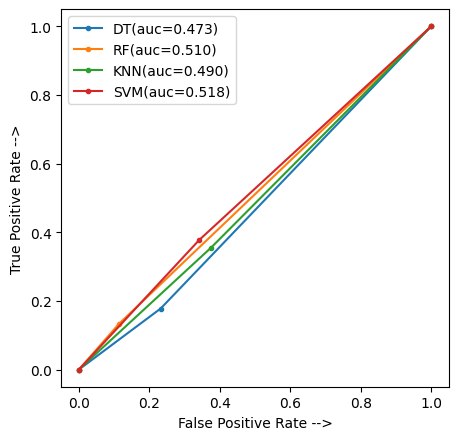

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(DT_fpr, DT_tpr,marker='.', label='DT(auc=%0.3f)'% auc_DT)
plt.plot(RF_fpr, RF_tpr,marker='.', label='RF(auc=%0.3f)'% auc_RF)
plt.plot(KNN_fpr, KNN_tpr,marker='.', label='KNN(auc=%0.3f)'% auc_KNN)
plt.plot(SVM_fpr, SVM_tpr,marker='.', label='SVM(auc=%0.3f)'% auc_SVM)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()


plt.show()

creating the Predictive system

In [ ]:
input_data = (1,43,0,1,4,37369196,88084536,1,0,0,0)

changing input data into numpy array

In [ ]:
input_data_as_numpy_array = np.asarray(input_data)

reshaping the array

In [ ]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

Standardize the input data

In [ ]:
std_data=scalar.transform(input_data_reshaped)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(std_data)

[[ 0.2981136   0.59917786 -1.85224664 -2.64284668 -0.56228415  0.2324456
   2.52235468  2.16366624 -0.58363342 -0.35029868 -0.59893831]]


Making the prediction

In [ ]:
prediction = classifier.predict(std_data)

In [ ]:
print (prediction)

[1]


In [ ]:
if (prediction[0]==0):
  print('The person is not depressed')
else:
  print('The person is depressed')

The person is depressed


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename='trained_model.save'

In [ ]:
pickle.dump(classifier, open(filename, 'wb'))

loading the saved model

In [ ]:
loaded_model = pickle.load(open('trained_model.save', 'rb'))

In [ ]:
input_data = (1,43,0,1,4,37369196,88084536,1,0,0,0)

In [ ]:
input_data_as_numpy_array = np.asarray(input_data)

In [ ]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = loaded_model.predict(std_data)

In [ ]:
print(prediction)

[1]


In [ ]:
if(prediction[0]==0):
  print('The person is not depressed')
else:
  print('The person is depressed')


The person is depressed
